# RAIN FORECASTING (PREDIKSI CUACA HUJAN)

Salah satu aplikasi meteorologi yang paling penting adalah perkiraan cuaca (weather forecasting), yang memengaruhi banyak hal, seperti pertanian, transportasi, energi, dan perencanaan kegiatan sehari-hari.

Analisis dan peramalan cuaca dilakukan pada proyek ini menggunakan dataset yang diperoleh dari platform Kaggle. Dataset ini mencakup berbagai parameter cuaca, seperti suhu, kelembapan, kecepatan udara, tutupan awan, tekanan udara, dan hujan.


## FORECASTING CUACA HUJAN

Mari kita mulai tugas ini dengan mengimpor pustaka (library) Python dan kumpulan data (dataset) yang diperlukan.

In [2]:

# Import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


### **J.62DMI00.001.1 - Mengumpulkan Data**

Mengumpulkan dataset tentang daftar/tabel cuaca hujan.

Kumpulan data mencakup berbagai detail faktor yang mempengaruhi hujan, seperti parameter cuaca, seperti suhu, kelembapan, kecepatan udara, tutupan awan, tekanan udara, dan hujan.

In [3]:
# Load dataset

file_path = 'weather_forecast_data.csv'
data = pd.read_csv(file_path)

### **J.62DMI00.010.1 - Menentukan Label Data**

In [4]:
# Menampilkan nama kolom (features atau variabel)

print(data.columns)

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')


### **J.62DMI00.007.1 - Menentukan Objek Data**

In [5]:
# Menampilkan data 5 baris teratas

print(data.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [6]:
# Informasi umum tentang dataset

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None


### **J.62DMI00.005.1 - Menelaah Data**
Melakukan eksplorasi data untuk memahami pola produksi padi, hubungan antara variabel, dll.

Visualisasi data dengan scatter plot untuk melihat hubungan antara produksi dan variabel-variabel lainnya

In [7]:
# Menampilkan statistik deskriptif

print(data.describe())

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


Sekarang mari kita lihat korelasi antar variable (kolom).

In [8]:
import plotly.express as px

loan_status_count = data['Rain'].value_counts()
fig_loan_status = px.pie(loan_status_count,
                         names=loan_status_count.index,
                         title='Distribusi Hujan')
fig_loan_status.show()

Dari grafik lingkaran diatas menunjukan sebaran hujan seimbang 50:50

Sekarang mari kita lihat hubungan antara Suhu (Temperature) dan Cuaca Hujan (Rain).

In [9]:
fig_temperature = px.box(data, x='Rain',
                    y='Temperature',
                    color="Rain",
                    title='Distribusi hujan berdasarkan suhu')
fig_temperature.show()


Median variabel 'temperature' terhadap kategori 'rain' cenderung lebih rendah dibandingkan dengan 'no rain'. Terdapat jangkauan mencolok pada suhu untuk kedua kategori, interquartil (IQR) pada kategori 'no rain' mencapai nilai yang tinggi

Sekarang mari kita lihat hubungan antara kelembapan (Humidity) dan cuaca hujan (Rain).

In [10]:
fig_temperature = px.box(data, x='Rain',
                    y='Humidity',
                    color="Rain",
                    title='Distribusi hujan berdasarkan kelembapan')
fig_temperature.show()

Median kelembapan tertinggi ada berada di kategori 'rain'. Terdapat distrbusi kelembapan yang lebih luas pada kategori 'no rain' dengan nilai median yang lebih rendah

Sekarang mari kita lihat hubungan antara kecepatan angin (Wind_Speed) dan cuaca hujan (Rain).

In [11]:
fig_temperature = px.box(data, x='Rain',
                    y='Wind_Speed',
                    color="Rain",
                    title='Distribusi hujan berdasarkan kelembapan')
fig_temperature.show()

Median kecepatan angin pada kategori 'rain' sedikit lebih rendah dari 'no rain'. Bedasarkan gambar boxplot diatas, jangkauan dari kedua kategori terlihat sama.

Sekarang mari kita lihat hubungan antara tutupan awan (Cloud_Cover) dan cuaca hujan (Rain).

In [12]:
fig_temperature = px.box(data, x='Rain',
                    y='Cloud_Cover',
                    color="Rain",
                    title='Distribusi hujan berdasarkan tutupan awan')
fig_temperature.show()

Median tutupan awan terhadap kategori 'rain' lebih tinggi daripada 'no rain'. Sebaran nilai tutupan awan lebih luas pada 'no rain', namun mediannya lebih rendah.

Sekarang mari kita lihat hubungan antara tekanan udara (Pressure) dan cuaca hujan (Rain).

In [13]:
fig_temperature = px.box(data, x='Rain',
                    y='Pressure',
                    color="Rain",
                    title='Distribusi hujan berdasarkan tekanan udara')
fig_temperature.show()

Pada tekanan udara sekilas tidak ada perbedaan sebaran nilai diantara kedua kategori. Median tekanan udara pada kategori 'rain' sedikit lebih rendah daripada 'no rain'

<ipython-input-14-a78e2869ff52>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     1
1    27.879734  46.489704    5.952484     4.990053   992.614190     0
2    25.069084  83.072843    1.371992    14.855784  1007.231620     0
3    23.622080  74.367758    7.050551    67.255282   982.632013     1
4    20.591370  96.858822    4.643921    47.676444   980.825142     0


<Axes: >

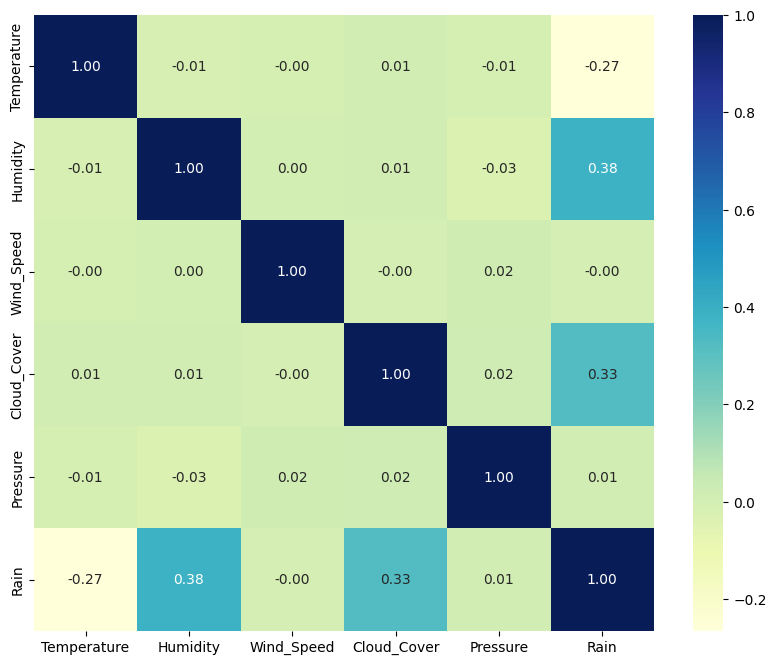

In [14]:
# Mengubah data kategorical menjadi data binari
data['Rain'] = data['Rain'].replace({'no rain': 0, 'rain': 1}).fillna(0).astype(int)

print(data.head())

# Korelasi (hubungan) antar variabel
# Warna biru tua menunjukkan korelasi (hubungan) bagus -- nilai persentase besar
# Warna hijau menunjukkan tidak ada korelasi (hubungan) -- nilai 0
# Warna kuning/cream menunjukkan korelasi (hubungan) bagus yang berlawanan -- nilai persentase negatif besar

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

Terlihat bahwa cuaca hujan dipengaruhi oleh suhu, kelembapan, dan tutupan awan.

### **J.62DMI00.006.1 - Memvalidasi Data**
Memeriksa integritas data untuk memastikan tidak ada nilai yang hilang atau tidak valid.

In [15]:
# Memeriksa missing values

print(data.isnull().sum())

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


Terlihat tidak ada data yang bernilai null atau Nan

### **J.62DMI00.008.1 - Membersihkan Data**

Mengisi nilai yang hilang jika ada, misalnya dengan menggunakan Teknik imputasi data.

Menghapus data yang tidak relevan atau outlier yang ekstrim.



In [16]:
# Data preprossesing dengan SimpleImputer

from sklearn.impute import SimpleImputer

# Membuat objek SimpleImputer dengan strategi menggunakan nilai rata-rata
imputer = SimpleImputer(strategy='mean')

# Menggunakan SimpleImputer untuk mengisi nilai yang hilang dalam dataset
data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure','Rain']] = imputer.fit_transform(
    data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure','Rain']]
)

print(data)


      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759   1.0
1       27.879734  46.489704    5.952484     4.990053   992.614190   0.0
2       25.069084  83.072843    1.371992    14.855784  1007.231620   0.0
3       23.622080  74.367758    7.050551    67.255282   982.632013   1.0
4       20.591370  96.858822    4.643921    47.676444   980.825142   0.0
...           ...        ...         ...          ...          ...   ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181   0.0
2496    27.558479  46.481744   10.884915    39.715133  1008.590961   0.0
2497    28.108274  43.817178    2.897128    75.842952   999.119187   0.0
2498    14.789275  57.908105    2.374717     2.378743  1046.501875   0.0
2499    26.554356  97.101517   18.563084    81.357508  1001.729176   0.0

[2500 rows x 6 columns]


### **J.62DMI00.009.1 - Mengkonstruksi Data**

Melakukan normalisasi data (karena perbedaan nilai data yang sangat jauh).

In [17]:
# Normalisasi data menggunakan metode Min-Max Scaling.

from sklearn.preprocessing import MinMaxScaler

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Membuat DataFrame baru dengan data yang sudah dinormalisasi
normalized_data = pd.DataFrame(scaled_data, columns=data.columns)

# Menampilkan lima baris pertama data yang sudah dinormalisasi
print(normalized_data.head())


   Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  Rain
0     0.548885  0.851343    0.366485     0.504954  0.748370   1.0
1     0.715305  0.235520    0.297292     0.049759  0.180070   0.0
2     0.602850  0.758193    0.068145     0.148433  0.388977   0.0
3     0.544954  0.633821    0.352225     0.672518  0.037409   1.0
4     0.423693  0.955157    0.231829     0.476696  0.011586   0.0


### **J.62DMI00.013.1 - Membangun Model**

Kita akan membangun model prediktif dengan menggunakan algoritma SVM  dan decision tree.

#### MODEL 1 : SVM

In [18]:
# Memilih fitur X (variabel independen) dan target y (variabel dependen)
X = normalized_data.drop('Rain', axis=1)
y = normalized_data['Rain']

In [19]:
# Memisahkan data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Displaying the shapes of the resulting datasets for verification
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_test.shape)

Training features shape: (2000, 5)
Validation features shape: (500, 5)
Training target shape: (2000,)
Validation target shape: (500,)


In [21]:
from sklearn.svm import SVC
model1 = SVC(random_state=42)
model1.fit(X_train, y_train)

SVC(random_state=42)

In [22]:
y_pred1 = model1.predict(X_test)
print(y_pred1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [23]:
# Konversikan X_test kedalam sebuah DataFrame
X_test_df1 = pd.DataFrame(X_test, columns=X_test.columns)

# Tambahkan nilai prediksi kedalam X_test_df
X_test_df1['Rain_Predicted'] = y_pred1
print(X_test_df1.head())

      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  Rain_Predicted
1447     0.709165  0.038555    0.914822     0.223765  0.407123             0.0
1114     0.441417  0.241998    0.773455     0.560102  0.863320             0.0
1064     0.511284  0.575297    0.001282     0.500666  0.607025             0.0
2287     0.901728  0.984584    0.305643     0.971320  0.772202             0.0
1537     0.906661  0.234801    0.374783     0.423989  0.012062             0.0


#### MODEL 2 : DECISION TREE

In [24]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred2 = model2.predict(X_test)
print(y_pred2)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [26]:
# Konversikan X_test kedalam sebuah DataFrame
X_test_df2 = pd.DataFrame(X_test, columns=X_test.columns)

# Tambahkan nilai prediksi kedalam X_test_df
X_test_df2['Rain_Predicted'] = y_pred2
print(X_test_df2.head())

      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  Rain_Predicted
1447     0.709165  0.038555    0.914822     0.223765  0.407123             0.0
1114     0.441417  0.241998    0.773455     0.560102  0.863320             0.0
1064     0.511284  0.575297    0.001282     0.500666  0.607025             1.0
2287     0.901728  0.984584    0.305643     0.971320  0.772202             0.0
1537     0.906661  0.234801    0.374783     0.423989  0.012062             0.0


### **J.62DMI00.014.1 - Mengevaluasi Hasil Pemodelan**

Accuracy of SVM: 0.98


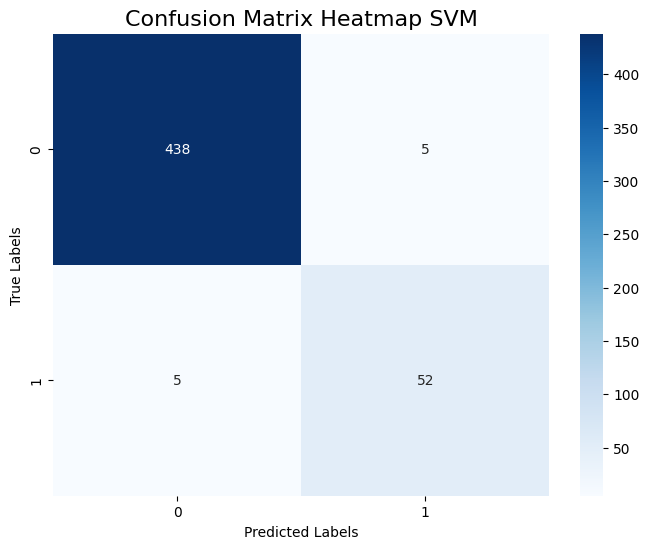

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       443
         1.0       0.91      0.91      0.91        57

    accuracy                           0.98       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi hasil SVM
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy of SVM: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
confusion_matrix = sns.heatmap(tf.math.confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
confusion_matrix.set_title('Confusion Matrix Heatmap SVM', fontsize=16)
confusion_matrix.set_xlabel('Predicted Labels')
confusion_matrix.set_ylabel('True Labels')
plt.show()

report = classification_report(y_test, y_pred1)
print("Classification Report:")
print(report)

Accuracy of Decision Tree: 1.00


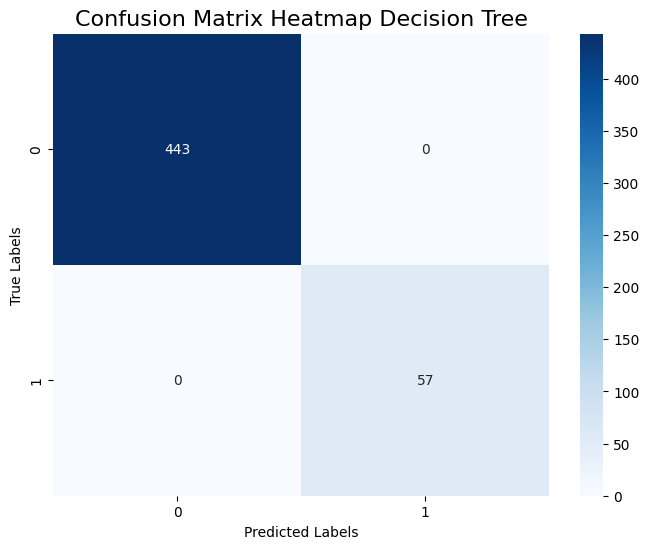

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       443
         1.0       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi hasil SVM
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
confusion_matrix = sns.heatmap(tf.math.confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
confusion_matrix.set_title('Confusion Matrix Heatmap Decision Tree', fontsize=16)
confusion_matrix.set_xlabel('Predicted Labels')
confusion_matrix.set_ylabel('True Labels')
plt.show()


report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(report)

## KESIMPULAN